In [1]:
import tensorflow as tf
import time

# Load and preprocess data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# CNN Model
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train and evaluate
start_time = time.time()
cnn_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
cnn_time = time.time() - start_time
cnn_acc = cnn_model.evaluate(x_test, y_test, verbose=0)[1]

print(f"CNN Accuracy: {cnn_acc:.4f}, Training Time: {cnn_time:.2f} sec")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.7792 - loss: 0.6104 - val_accuracy: 0.8710 - val_loss: 0.3567
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8908 - loss: 0.3028 - val_accuracy: 0.8990 - val_loss: 0.2854
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9061 - loss: 0.2536 - val_accuracy: 0.9048 - val_loss: 0.2652
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9158 - loss: 0.2233 - val_accuracy: 0.9109 - val_loss: 0.2507
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9266 - loss: 0.1959 - val_accuracy: 0.9041 - val_loss: 0.2670
CNN Accuracy: 0.9041, Training Time: 54.49 sec


In [2]:
# LeNet Model
lenet_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.AveragePooling2D(2,2),
    tf.keras.layers.Conv2D(16, (5,5), activation='relu'),
    tf.keras.layers.AveragePooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

lenet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train and evaluate
start_time = time.time()
lenet_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
lenet_time = time.time() - start_time
lenet_acc = lenet_model.evaluate(x_test, y_test, verbose=0)[1]

print(f"LeNet Accuracy: {lenet_acc:.4f}, Training Time: {lenet_time:.2f} sec")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7023 - loss: 0.8102 - val_accuracy: 0.8366 - val_loss: 0.4518
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8504 - loss: 0.4087 - val_accuracy: 0.8562 - val_loss: 0.3889
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8721 - loss: 0.3478 - val_accuracy: 0.8759 - val_loss: 0.3505
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8827 - loss: 0.3170 - val_accuracy: 0.8828 - val_loss: 0.3192
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8953 - loss: 0.2860 - val_accuracy: 0.8850 - val_loss: 0.3206
LeNet Accuracy: 0.8850, Training Time: 37.18 sec


In [3]:
# ResNet Model
# Change the input_shape to (32, 32, 3) or larger
resnet_model = tf.keras.applications.ResNet50(weights=None, input_shape=(32,32,3), classes=10)
# You'll need to resize your input data accordingly (x_train, x_test) to match this shape

resnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train and evaluate
start_time = time.time()
# Resize x_train and x_test to (32, 32, 3) using tf.image.resize
x_train_resized = tf.image.resize(x_train, [32, 32])
x_test_resized = tf.image.resize(x_test, [32, 32])

# Repeat the grayscale channel 3 times to create a 3-channel image
x_train_resized = tf.repeat(x_train_resized, 3, axis=-1)
x_test_resized = tf.repeat(x_test_resized, 3, axis=-1)

resnet_model.fit(x_train_resized, y_train, epochs=5, validation_data=(x_test_resized, y_test))
resnet_time = time.time() - start_time
resnet_acc = resnet_model.evaluate(x_test_resized, y_test, verbose=0)[1]

print(f"ResNet Accuracy: {resnet_acc:.4f}, Training Time: {resnet_time:.2f} sec")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 122s 35ms/step - accuracy: 0.7046 - loss: 1.0750 - val_accuracy: 0.7695 - val_loss: 0.8170
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 112s 31ms/step - accuracy: 0.7794 - loss: 0.7311 - val_accuracy: 0.8336 - val_loss: 0.4733
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.8365 - loss: 0.4806 - val_accuracy: 0.8207 - val_loss: 0.4934
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.8342 - loss: 0.4705 - val_accuracy: 0.6671 - val_loss: 1.0107
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.8404 - loss: 0.4756 - val_accuracy: 0.7427 - val_loss: 0.7308
ResNet Accuracy: 0.7427, Training Time: 457.03 sec


In [ ]:
# LSTM Model
lstm_model = tf.keras.Sequential([
    tf.keras.layers.Reshape((28, 28), input_shape=(28,28,1)),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(10, activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train and evaluate
start_time = time.time()
lstm_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
lstm_time = time.time() - start_time
lstm_acc = lstm_model.evaluate(x_test, y_test, verbose=0)[1]

print(f"LSTM Accuracy: {lstm_acc:.4f}, Training Time: {lstm_time:.2f} sec")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7073 - loss: 0.7834 - val_accuracy: 0.8323 - val_loss: 0.4620
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8432 - loss: 0.4251 - val_accuracy: 0.8511 - val_loss: 0.3972
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8668 - loss: 0.3575 - val_accuracy: 0.8646 - val_loss: 0.3635
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8776 - loss: 0.3299 - val_accuracy: 0.8725 - val_loss: 0.3400
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8895 - loss: 0.3011 - val_accuracy: 0.8812 - val_loss: 0.3228
LSTM Accuracy: 0.8812, Training Time: 95.84 sec


In [ ]:
# FCNN Model
fcnn_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

fcnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train and evaluate
start_time = time.time()
fcnn_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
fcnn_time = time.time() - start_time
fcnn_acc = fcnn_model.evaluate(x_test, y_test, verbose=0)[1]

print(f"FCNN Accuracy: {fcnn_acc:.4f}, Training Time: {fcnn_time:.2f} sec")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7837 - loss: 0.6200 - val_accuracy: 0.8456 - val_loss: 0.4355
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8620 - loss: 0.3830 - val_accuracy: 0.8515 - val_loss: 0.4064
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8756 - loss: 0.3445 - val_accuracy: 0.8653 - val_loss: 0.3724
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8866 - loss: 0.3093 - val_accuracy: 0.8750 - val_loss: 0.3515
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8907 - loss: 0.2948 - val_accuracy: 0.8759 - val_loss: 0.3442
FCNN Accuracy: 0.8759, Training Time: 43.60 sec


In [ ]:
# Print Results
print("\nModel Accuracies:")
print(f"CNN Accuracy: {cnn_acc:.4f}")
print(f"LeNet Accuracy: {lenet_acc:.4f}")
print(f"ResNet Accuracy: {resnet_acc:.4f}")
print(f"LSTM Accuracy: {lstm_acc:.4f}")
print(f"FCNN Accuracy: {fcnn_acc:.4f}")

print("\nTraining Times:")
print(f"CNN Training Time: {cnn_time:.2f} seconds")
print(f"LeNet Training Time: {lenet_time:.2f} seconds")
print(f"ResNet Training Time: {resnet_time:.2f} seconds")
print(f"LSTM Training Time: {lstm_time:.2f} seconds")
print(f"FCNN Training Time: {fcnn_time:.2f} seconds")

# Calculate and print percentage time gain
base_time = cnn_time  # Using CNN as the baseline
percentage_gains = {
    "CNN": 0,
    "LeNet": ((base_time - lenet_time) / base_time) * 100,
    "ResNet": ((base_time - resnet_time) / base_time) * 100,
    "LSTM": ((base_time - lstm_time) / base_time) * 100,
    "FCNN": ((base_time - fcnn_time) / base_time) * 100,
}

print("\nPercentage Time Gain:")
for model, gain in percentage_gains.items():
    print(f"{model}: {gain:.2f}% time gain")



Model Accuracies:
CNN Accuracy: 0.9086
LeNet Accuracy: 0.8871
ResNet Accuracy: 0.8550
LSTM Accuracy: 0.8812
FCNN Accuracy: 0.8759

Training Times:
CNN Training Time: 63.20 seconds
LeNet Training Time: 47.07 seconds
ResNet Training Time: 488.79 seconds
LSTM Training Time: 95.84 seconds
FCNN Training Time: 43.60 seconds

Percentage Time Gain:
CNN: 0.00% time gain
LeNet: 25.51% time gain
ResNet: -673.41% time gain
LSTM: -51.64% time gain
FCNN: 31.01% time gain


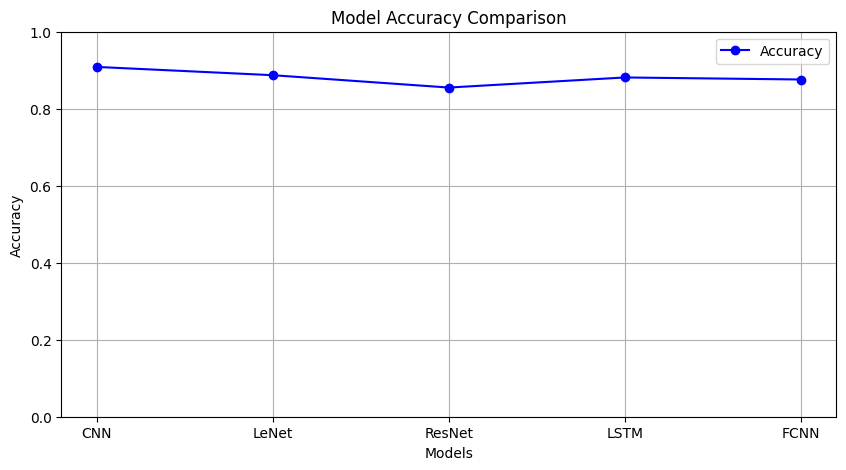

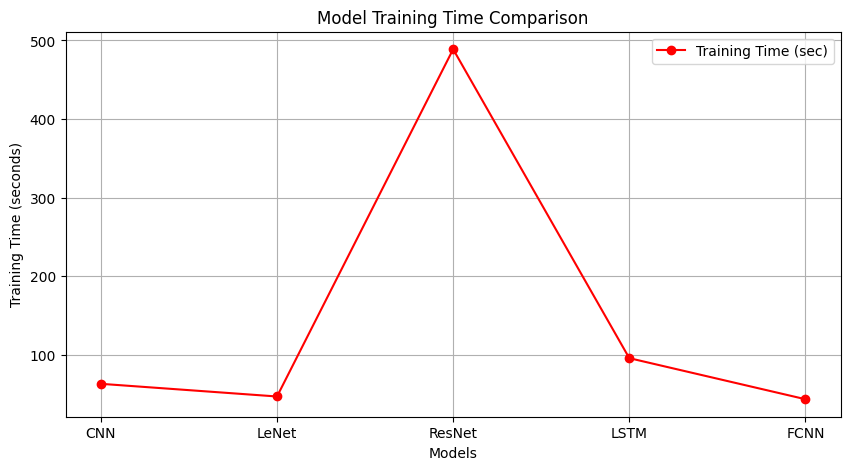

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ["CNN", "LeNet", "ResNet", "LSTM", "FCNN"]

# Accuracy and Training Time Data
accuracies = [cnn_acc, lenet_acc, resnet_acc, lstm_acc, fcnn_acc]
training_times = [cnn_time, lenet_time, resnet_time, lstm_time, fcnn_time]

# Line graph for Accuracy
plt.figure(figsize=(10, 5))
plt.plot(models, accuracies, marker='o', linestyle='-', color='b', label="Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.grid(True)
plt.legend()
plt.show()

# Line graph for Training Time
plt.figure(figsize=(10, 5))
plt.plot(models, training_times, marker='o', linestyle='-', color='r', label="Training Time (sec)")
plt.xlabel("Models")
plt.ylabel("Training Time (seconds)")
plt.title("Model Training Time Comparison")
plt.grid(True)
plt.legend()
plt.show()


Round 1 (FedSGD): Accuracy 0.8240, Time: 19.85 sec
Round 2 (FedSGD): Accuracy 0.8551, Time: 37.81 sec
Round 3 (FedSGD): Accuracy 0.8671, Time: 56.28 sec
Round 4 (FedSGD): Accuracy 0.8765, Time: 74.39 sec
Round 5 (FedSGD): Accuracy 0.8840, Time: 93.85 sec
Round 6 (FedSGD): Accuracy 0.8911, Time: 112.11 sec
Round 7 (FedSGD): Accuracy 0.8964, Time: 129.02 sec
Round 8 (FedSGD): Accuracy 0.8983, Time: 147.83 sec
Round 9 (FedSGD): Accuracy 0.9014, Time: 167.02 sec
Round 10 (FedSGD): Accuracy 0.9035, Time: 186.70 sec


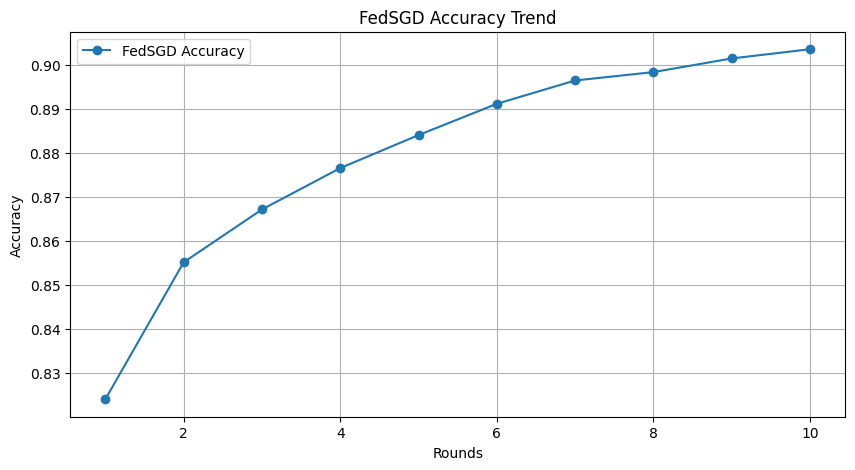

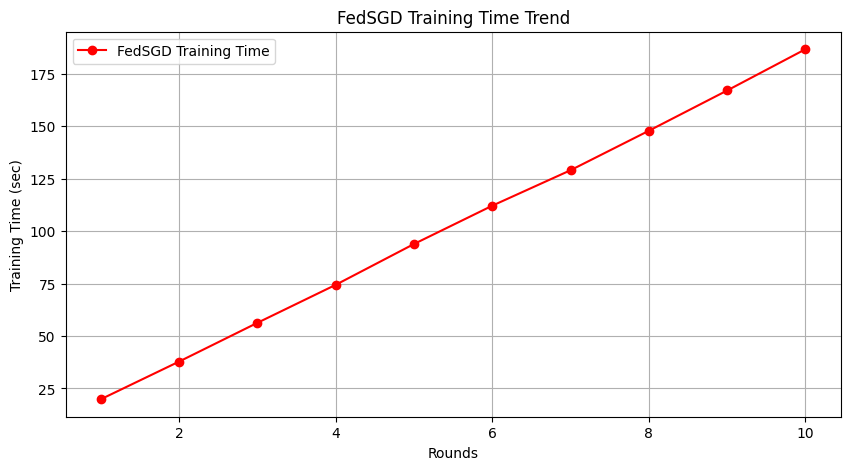

In [5]:
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt

# Load Fashion-MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define CNN Model
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Split data among clients
num_clients = 5
data_per_client = len(x_train) // num_clients
clients = []
for i in range(num_clients):
    start = i * data_per_client
    end = start + data_per_client
    clients.append((x_train[start:end], y_train[start:end]))

# Initialize global weights
global_weights = cnn_model.get_weights()
rounds = 10
acc_history = []
time_history = []

start_time = time.time()
for r in range(rounds):
    local_weights = []
    for client_data in clients:
        local_model = tf.keras.models.clone_model(cnn_model)
        local_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        local_model.set_weights(global_weights)
        local_model.fit(client_data[0], client_data[1], epochs=1, verbose=0)
        local_weights.append(local_model.get_weights())

    # Aggregate gradients (FedSGD updates weights directly)
    # Convert local_weights to NumPy arrays with consistent shapes
    local_weights = [np.array(w, dtype=object) for w in local_weights]  # Convert to object dtype
    global_weights = np.mean(local_weights, axis=0) # Calculate mean with object dtype

    # Check if global_weights is an object array and convert to list if necessary
    if global_weights.dtype == object:
        global_weights = [w.astype(global_weights[0].dtype) for w in global_weights]
                                                        # Convert back to original dtype

    cnn_model.set_weights(global_weights)

    acc = cnn_model.evaluate(x_test, y_test, verbose=0)[1]
    acc_history.append(acc)
    time_history.append(time.time() - start_time)

    print(f'Round {r+1} (FedSGD): Accuracy {acc:.4f}, Time: {time_history[-1]:.2f} sec')

# Plot Accuracy and Training Time
plt.figure(figsize=(10, 5))
plt.plot(range(1, rounds + 1), acc_history, marker='o', linestyle='-', label="FedSGD Accuracy")
plt.xlabel("Rounds")
plt.ylabel("Accuracy")
plt.title("FedSGD Accuracy Trend")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, rounds + 1), time_history, marker='o', linestyle='-', color='r', label="FedSGD Training Time")
plt.xlabel("Rounds")
plt.ylabel("Training Time (sec)")
plt.title("FedSGD Training Time Trend")
plt.grid(True)
plt.legend()
plt.show()

Round 1 (FedAvg): Accuracy 0.9090, Time: 22.73 sec
Round 2 (FedAvg): Accuracy 0.9095, Time: 41.92 sec
Round 3 (FedAvg): Accuracy 0.9107, Time: 60.83 sec
Round 4 (FedAvg): Accuracy 0.9111, Time: 81.82 sec
Round 5 (FedAvg): Accuracy 0.9126, Time: 100.86 sec
Round 6 (FedAvg): Accuracy 0.9165, Time: 120.79 sec
Round 7 (FedAvg): Accuracy 0.9136, Time: 140.18 sec
Round 8 (FedAvg): Accuracy 0.9158, Time: 162.13 sec
Round 9 (FedAvg): Accuracy 0.9164, Time: 181.04 sec
Round 10 (FedAvg): Accuracy 0.9183, Time: 200.93 sec


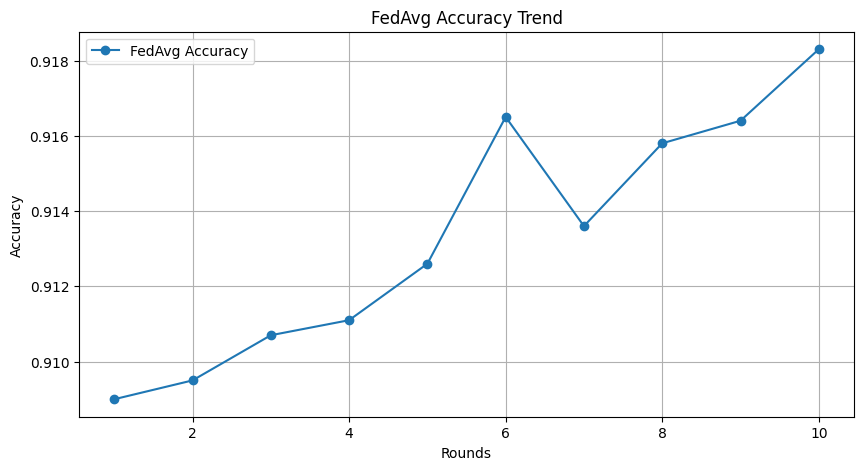

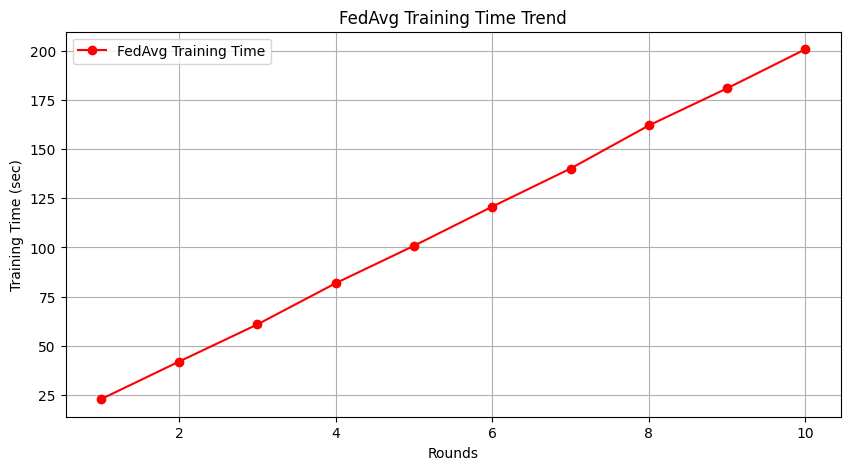

In [ ]:
# Reinitialize Global Weights
global_weights = cnn_model.get_weights()
acc_history = []
time_history = []

start_time = time.time()
for r in range(rounds):
    local_weights = []
    for client_data in clients:
        local_model = tf.keras.models.clone_model(cnn_model)
        local_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        local_model.set_weights(global_weights)
        local_model.fit(client_data[0], client_data[1], epochs=1, verbose=0)
        local_weights.append(local_model.get_weights())

    # Federated Averaging
    global_weights = [np.mean(np.array(weights), axis=0) for weights in zip(*local_weights)]
    cnn_model.set_weights(global_weights)

    acc = cnn_model.evaluate(x_test, y_test, verbose=0)[1]
    acc_history.append(acc)
    time_history.append(time.time() - start_time)

    print(f'Round {r+1} (FedAvg): Accuracy {acc:.4f}, Time: {time_history[-1]:.2f} sec')

# Plot Accuracy and Training Time
plt.figure(figsize=(10, 5))
plt.plot(range(1, rounds + 1), acc_history, marker='o', linestyle='-', label="FedAvg Accuracy")
plt.xlabel("Rounds")
plt.ylabel("Accuracy")
plt.title("FedAvg Accuracy Trend")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, rounds + 1), time_history, marker='o', linestyle='-', color='r', label="FedAvg Training Time")
plt.xlabel("Rounds")
plt.ylabel("Training Time (sec)")
plt.title("FedAvg Training Time Trend")
plt.grid(True)
plt.legend()
plt.show()


Round 1 (FedProx): Accuracy 0.9126, Round Time: 19.64 sec
Round 2 (FedProx): Accuracy 0.9125, Round Time: 17.98 sec
Round 3 (FedProx): Accuracy 0.9126, Round Time: 19.85 sec
Round 4 (FedProx): Accuracy 0.9126, Round Time: 18.22 sec
Round 5 (FedProx): Accuracy 0.9127, Round Time: 20.17 sec
Round 6 (FedProx): Accuracy 0.9127, Round Time: 18.83 sec
Round 7 (FedProx): Accuracy 0.9128, Round Time: 16.44 sec
Round 8 (FedProx): Accuracy 0.9127, Round Time: 17.83 sec
Round 9 (FedProx): Accuracy 0.9128, Round Time: 19.33 sec
Round 10 (FedProx): Accuracy 0.9131, Round Time: 17.21 sec


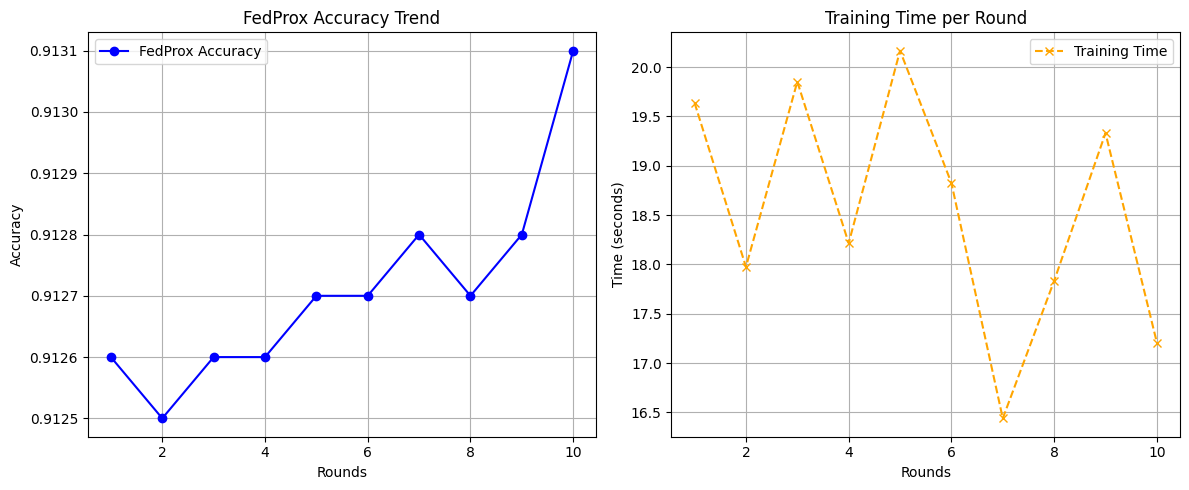

In [10]:
mu = 0.01  # Regularization term

# Reinitialize Global Weights
global_weights = cnn_model.get_weights()
acc_history = []
time_history = []

for r in range(rounds):
    round_start_time = time.time()

    local_weights = []
    for client_data in clients:
        local_model = tf.keras.models.clone_model(cnn_model)
        local_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        local_model.set_weights(global_weights)
        local_model.fit(client_data[0], client_data[1], epochs=1, verbose=0)
        local_weights.append(local_model.get_weights())

    # FedProx Weight Update
    global_weights = [
        (1 - mu) * gw + mu * np.mean([lw[i] for lw in local_weights], axis=0)
        for i, gw in enumerate(global_weights)
    ]
    cnn_model.set_weights(global_weights)

    acc = cnn_model.evaluate(x_test, y_test, verbose=0)[1]
    acc_history.append(acc)

    round_time = time.time() - round_start_time
    time_history.append(round_time)

    print(f'Round {r+1} (FedProx): Accuracy {acc:.4f}, Round Time: {round_time:.2f} sec')

# Plot Accuracy and Training Time
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, rounds + 1), acc_history, marker='o', linestyle='-', color='blue', label="FedProx Accuracy")
plt.xlabel("Rounds")
plt.ylabel("Accuracy")
plt.title("FedProx Accuracy Trend")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, rounds + 1), time_history, marker='x', linestyle='--', color='orange', label="Training Time")
plt.xlabel("Rounds")
plt.ylabel("Time (seconds)")
plt.title("Training Time per Round")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


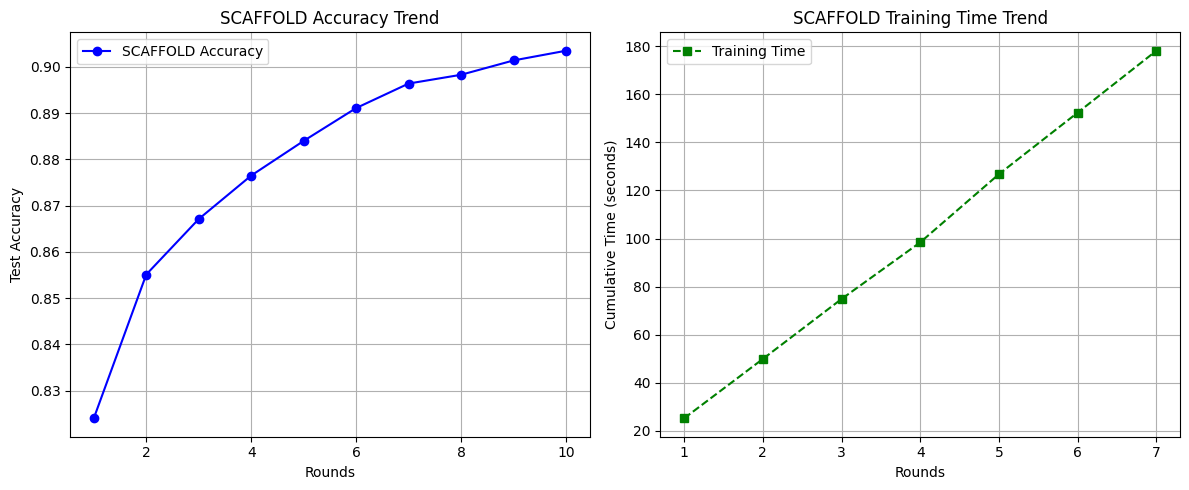

In [9]:
# Plot Accuracy and Training Time
plt.figure(figsize=(12, 5))

# --- Plot 1: Accuracy Trend ---
plt.subplot(1, 2, 1)
plt.plot(range(1, len(acc_history) + 1), acc_history, marker='o', linestyle='-', color='blue', label="SCAFFOLD Accuracy")  # Changed x-axis range
plt.xlabel("Rounds")
plt.ylabel("Test Accuracy")
plt.title("SCAFFOLD Accuracy Trend")
plt.grid(True)
plt.legend()

# --- Plot 2: Training Time Trend ---
plt.subplot(1, 2, 2)
plt.plot(range(1, len(time_history) + 1), time_history, marker='s', linestyle='--', color='green', label="Training Time")  # Changed x-axis range
plt.xlabel("Rounds")
plt.ylabel("Cumulative Time (seconds)")
plt.title("SCAFFOLD Training Time Trend")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt

# Load Fashion-MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define CNN Model (Not using a function)
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Split data among clients
num_clients = 5
data_per_client = len(x_train) // num_clients
clients = []
for i in range(num_clients):
    start = i * data_per_client
    end = start + data_per_client
    clients.append((x_train[start:end], y_train[start:end]))

# Initialize server model
server_model = tf.keras.models.clone_model(cnn_model)
server_model.set_weights(cnn_model.get_weights())
global_weights = server_model.get_weights()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


FedDyn Round 1 - Accuracy: 0.8559
FedDyn Round 2 - Accuracy: 0.8717
FedDyn Round 3 - Accuracy: 0.8770
FedDyn Round 4 - Accuracy: 0.8849
FedDyn Round 5 - Accuracy: 0.8893
FedDyn Round 6 - Accuracy: 0.8977
FedDyn Round 7 - Accuracy: 0.9017
FedDyn Round 8 - Accuracy: 0.9003
FedDyn Round 9 - Accuracy: 0.9037
FedDyn Round 10 - Accuracy: 0.9051


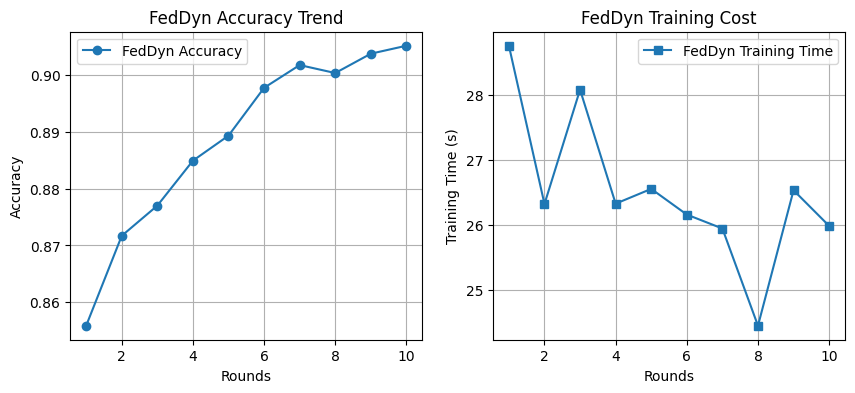

In [ ]:
local_losses = [0] * num_clients
alpha = 0.01  # Regularization factor
accuracy_feddyn = []
training_time_feddyn = []

# Compile the server_model before the training loop
server_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

for r in range(10):  # Training rounds
    start_time = time.time()
    local_weights = []

    for i, (x_local, y_local) in enumerate(clients):
        cnn_model.set_weights(global_weights)
        dyn_reg = alpha * local_losses[i]

        cnn_model.compile(optimizer=tf.keras.optimizers.Adam(),
                          loss=lambda y_true, y_pred: tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred) + dyn_reg,
                          metrics=['accuracy'])

        cnn_model.fit(x_local, y_local, epochs=1, verbose=0)
        local_weights.append(cnn_model.get_weights())
        local_losses[i] = np.mean(cnn_model.evaluate(x_local, y_local, verbose=0)[0])

    global_weights = [np.mean(np.array(weights), axis=0) for weights in zip(*local_weights)]
    server_model.set_weights(global_weights)

    acc = server_model.evaluate(x_test, y_test, verbose=0)[1]
    accuracy_feddyn.append(acc)
    training_time_feddyn.append(time.time() - start_time)

    print(f'FedDyn Round {r+1} - Accuracy: {acc:.4f}')


# Plot FedDyn results
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), accuracy_feddyn, marker='o', label='FedDyn Accuracy')
plt.xlabel("Rounds")
plt.ylabel("Accuracy")
plt.title("FedDyn Accuracy Trend")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, 11), training_time_feddyn, marker='s', label='FedDyn Training Time')
plt.xlabel("Rounds")
plt.ylabel("Training Time (s)")
plt.title("FedDyn Training Cost")
plt.legend()
plt.grid(True)

plt.show()


FedNova Round 1 - Accuracy: 0.9051
FedNova Round 2 - Accuracy: 0.9051
FedNova Round 3 - Accuracy: 0.9051
FedNova Round 4 - Accuracy: 0.9051
FedNova Round 5 - Accuracy: 0.9051
FedNova Round 6 - Accuracy: 0.9051
FedNova Round 7 - Accuracy: 0.9051
FedNova Round 8 - Accuracy: 0.9051
FedNova Round 9 - Accuracy: 0.9051
FedNova Round 10 - Accuracy: 0.9051


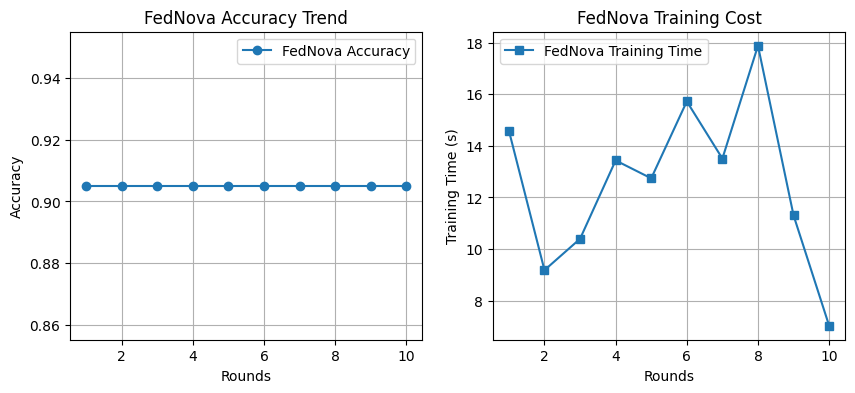

In [ ]:
global_weights = server_model.get_weights()
accuracy_fednova = []
training_time_fednova = []

for r in range(10):
    start_time = time.time()
    local_updates = []
    total_steps = 0

    for x_local, y_local in clients:
        cnn_model.set_weights(global_weights)
        local_epochs = np.random.randint(1, 4)  # Different clients train for different steps
        cnn_model.fit(x_local, y_local, epochs=local_epochs, verbose=0)

        # Calculate updates as lists of NumPy arrays
        local_update = [np.subtract(w1, w2)
                       for w1, w2 in zip(cnn_model.get_weights(), global_weights)]
        local_updates.append(local_update)

        total_steps += len(x_local)

    # Aggregate updates
    normalized_update = [np.sum(layer_updates, axis=0) / total_steps
                        for layer_updates in zip(*local_updates)]

    # Update global weights
    global_weights = [gw + nu for gw, nu in zip(global_weights, normalized_update)]

    server_model.set_weights(global_weights)
    acc = server_model.evaluate(x_test, y_test, verbose=0)[1]
    accuracy_fednova.append(acc)
    training_time_fednova.append(time.time() - start_time)

    print(f'FedNova Round {r+1} - Accuracy: {acc:.4f}')

# (Plotting code remains the same)

# Plot FedNova results
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), accuracy_fednova, marker='o', label='FedNova Accuracy')
plt.xlabel("Rounds")
plt.ylabel("Accuracy")
plt.title("FedNova Accuracy Trend")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, 11), training_time_fednova, marker='s', label='FedNova Training Time')
plt.xlabel("Rounds")
plt.ylabel("Training Time (s)")
plt.title("FedNova Training Cost")
plt.legend()
plt.grid(True)

plt.show()


FedOpt Round 1 - Accuracy: 0.9085
FedOpt Round 2 - Accuracy: 0.9109
FedOpt Round 3 - Accuracy: 0.9140
FedOpt Round 4 - Accuracy: 0.9150
FedOpt Round 5 - Accuracy: 0.9154
FedOpt Round 6 - Accuracy: 0.9164
FedOpt Round 7 - Accuracy: 0.9169
FedOpt Round 8 - Accuracy: 0.9134
FedOpt Round 9 - Accuracy: 0.9163
FedOpt Round 10 - Accuracy: 0.9168


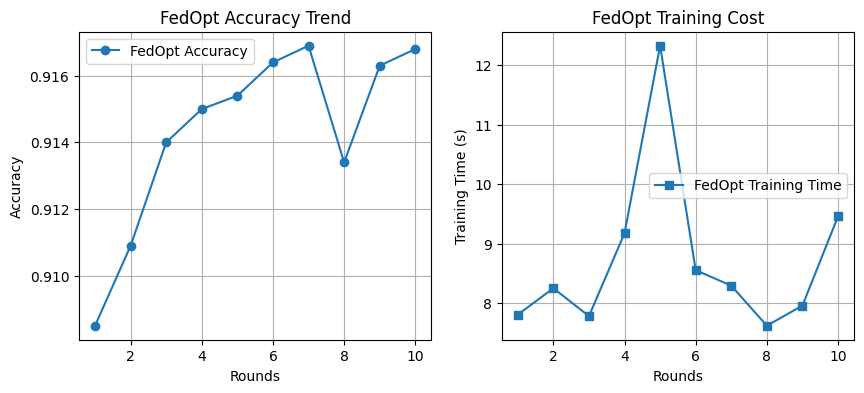

In [ ]:
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt

# ... (Previous code for data loading, model definition, client split, etc.) ...

# Initialize server model
server_model = tf.keras.models.clone_model(cnn_model)
server_model.set_weights(cnn_model.get_weights())
global_weights = server_model.get_weights()

# FedOpt
server_optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
accuracy_fedopt = []
training_time_fedopt = []

# Convert global_weights to TensorFlow variables *outside* the loop
global_weights = [tf.Variable(w) for w in global_weights]

for r in range(10):
    start_time = time.time()
    local_weights = []

    for x_local, y_local in clients:
        # Set the weights of the model using the TensorFlow variables
        cnn_model.set_weights([w.numpy() for w in global_weights])
        cnn_model.fit(x_local, y_local, epochs=1, verbose=0)
        local_weights.append(cnn_model.get_weights())

    # Calculate average update using nested list comprehension
    avg_update = [np.mean(np.array([lw[i] for lw in local_weights]), axis=0)
                  for i in range(len(local_weights[0]))]

    # Update global_weights (TensorFlow variables) directly
    for i in range(len(global_weights)):
        global_weights[i].assign(avg_update[i])

    # Set server model weights using the updated TensorFlow variables
    server_model.set_weights([w.numpy() for w in global_weights])

    # Compile the server_model before evaluation
    server_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    acc = server_model.evaluate(x_test, y_test, verbose=0)[1]
    accuracy_fedopt.append(acc)
    training_time_fedopt.append(time.time() - start_time)

    print(f'FedOpt Round {r + 1} - Accuracy: {acc:.4f}')

# Plot FedOpt results
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), accuracy_fedopt, marker='o', label='FedOpt Accuracy')
plt.xlabel("Rounds")
plt.ylabel("Accuracy")
plt.title("FedOpt Accuracy Trend")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, 11), training_time_fedopt, marker='s', label='FedOpt Training Time')
plt.xlabel("Rounds")
plt.ylabel("Training Time (s)")
plt.title("FedOpt Training Cost")
plt.legend()
plt.grid(True)

plt.show()